### 1. Import library

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

### 2. Load iris dataset

In [3]:
iris = load_iris()

# Use all 4 features for clustering
X = iris.data

print("Feature names:", iris.feature_names)
print("Shape:", X.shape)

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Shape: (150, 4)


### 3. Scale All Features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

### 4. Run DBSCAN

In [20]:
dbscan = DBSCAN(eps=0.8, min_samples=5)
labels = dbscan.fit_predict(X_scaled)
print(labels)


[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1
  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]


### 5. Scatter Plot (Only Sepal Length & Sepal Width)

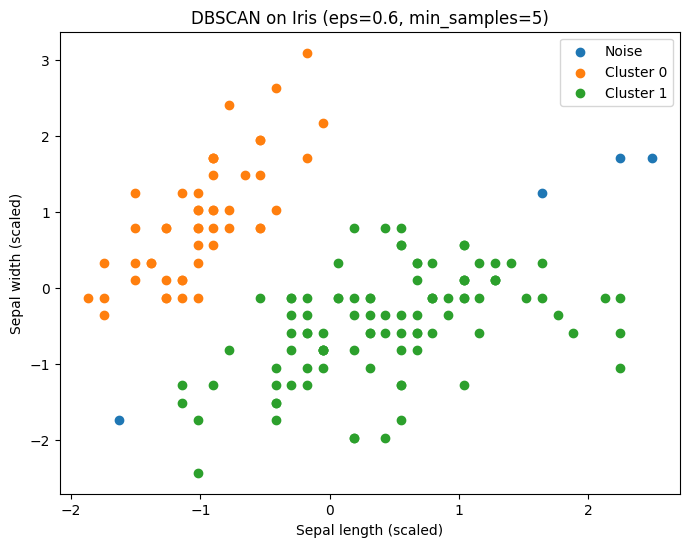

In [18]:
plt.figure(figsize=(8,6))

unique_labels = np.unique(labels)

for label in unique_labels:
    cluster_name = 'Noise' if label == -1 else f'Cluster {label}'
    
    plt.scatter(
        X_scaled[labels == label, 0],
        X_scaled[labels == label, 1],
        label=cluster_name
    )

plt.xlabel("Sepal length (scaled)")
plt.ylabel("Sepal width (scaled)")
plt.title("DBSCAN on Iris (eps=0.6, min_samples=5)")
plt.legend()
plt.show()

### 6 Clculate Silhouette score for DBSCAN (optional)

In [22]:
from sklearn.metrics import silhouette_score

# Exclude noise points (-1) for silhouette
mask = labels != -1
X_inliers = X_scaled[mask]
labels_inliers = labels[mask]

# Silhouette score requires at least 2 clusters (after removing noise)
n_clusters = len(set(labels_inliers))
if n_clusters >= 2:
    score = silhouette_score(X_inliers, labels_inliers)
    print(f"Silhouette score (excluding noise): {score:.4f}")
else:
    print("Silhouette score not defined: need at least 2 clusters (excluding noise).")

Silhouette score (excluding noise): 0.5979
